# Suggestions on how to analyze the iButton data

In [9]:
# Import all required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Process  one data file

In [3]:
# Specify path to data file (don't include file ending!)
file_name = 'data_ibuttons/left-4'

# Read data file
# Note: skiprows might need to be adapted such that all rows which are not data points are skipped
df = pd.read_csv(file_name+'.csv', header=None, names=range(5), index_col=False, skiprows=1)

# Rename columns
df.rename(columns = {0:'date', 1:'time', 2:'unit'}, inplace = True)

# Combine the values of columns 3 and 4 to have one column for temperature measurements
df['temperature'] = df[3]+1/10*df[4]

# Replace any nans with values from column 3. This is needed if the temperature does not 
# have any decimal values, i.e. 2 degrees in contrast to 2.5 degrees
df.temperature.fillna(df[3], inplace=True)
del df[3]
del df[4]

# Delete all data rows were temperature is above 0
df.drop(df[df.temperature >= 0].index, inplace=True)

In [4]:
# Display data
print(df)

           date       time unit  temperature
54   27.03.2023   15:54:00    C         -2.0
55   27.03.2023   15:55:00    C         -2.5
56   27.03.2023   15:56:00    C         -2.5
57   27.03.2023   15:57:00    C         -3.5
58   27.03.2023   15:58:00    C         -6.0
..          ...        ...  ...          ...
144  27.03.2023   17:24:00    C         -2.0
145  27.03.2023   17:25:00    C         -0.5
146  27.03.2023   17:26:00    C         -0.5
147  27.03.2023   17:27:00    C         -1.0
148  27.03.2023   17:28:00    C         -1.0

[95 rows x 4 columns]


## Process several data files

In [22]:
# Specify which files should be analyzed
file_list = ['left-4.csv', 'left-5.csv']
file_paths = ['data_ibuttons/' + file_name for file_name in file_list]

# Specify the height/order of the sensors (note: needs to be in same order as file_list)
height = [0.5, 2]

In [23]:
data = []

for idx, file in enumerate(file_paths):
    # Read data file
    df = pd.read_csv(file, header=None, names=range(5), index_col=False, skiprows=1)

    # Rename columns
    df.rename(columns = {0:'date', 1:'time', 2:'unit'}, inplace = True)

    # Combine the values of columns 3 and 4 to have one column for temperature measurements
    df['temperature'] = df[3]+1/10*df[4]

    # Replace any nans with values from column 3. This is needed if the temperature does not 
    # have any decimal values, i.e. 2 degrees in contrast to 2.5 degrees
    df.temperature.fillna(df[3], inplace=True)
    del df[3]
    del df[4]

    # Delete all data rows were temperature is above 0
    df.drop(df[df.temperature >= 0].index, inplace=True)
    
    # Mark which file was used
    df['file'] = file
    
    # Transfrom time column to correct data
    df['time'] = pd.to_datetime(df['time'].str.strip(), format= '%H:%M:%S')  
    
    # Add column in which height/ order of sensors is specified
    df['height'] = height[idx]
    
    data.append(df)

combined_data = pd.concat(data, axis=0, ignore_index=True)

In [24]:
# Display data
print(combined_data)

           date                time unit  temperature  \
0    27.03.2023 1900-01-01 15:54:00    C         -2.0   
1    27.03.2023 1900-01-01 15:55:00    C         -2.5   
2    27.03.2023 1900-01-01 15:56:00    C         -2.5   
3    27.03.2023 1900-01-01 15:57:00    C         -3.5   
4    27.03.2023 1900-01-01 15:58:00    C         -6.0   
..          ...                 ...  ...          ...   
153  27.03.2023 1900-01-01 16:53:00    C         -0.5   
154  27.03.2023 1900-01-01 16:54:00    C         -1.0   
155  27.03.2023 1900-01-01 16:55:00    C         -1.0   
156  27.03.2023 1900-01-01 16:56:00    C         -1.0   
157  27.03.2023 1900-01-01 16:57:00    C         -1.0   

                         file  height  
0    data_ibuttons/left-4.csv     0.5  
1    data_ibuttons/left-4.csv     0.5  
2    data_ibuttons/left-4.csv     0.5  
3    data_ibuttons/left-4.csv     0.5  
4    data_ibuttons/left-4.csv     0.5  
..                        ...     ...  
153  data_ibuttons/left-5.csv     2

## Visualize data

Text(0, 0.5, 'temperature [C]')

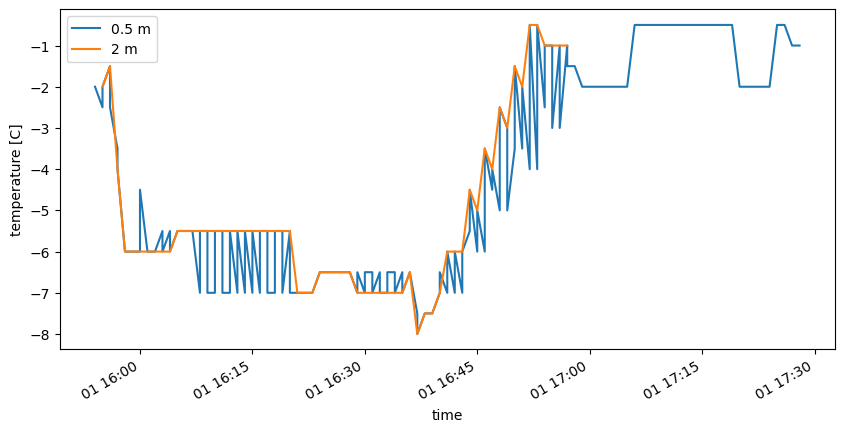

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot data from all sensors on one y axes to compare values
for idx, file in enumerate(file_paths):
    # Get data from one sensor
    data_from_one_sensor = combined_data[combined_data.file >= file]
    # Plot data for current sensor    
    data_from_one_sensor.plot(x='time', y='temperature', ax=ax, label=str(height[idx]) + ' m')
    
# Add y axes label
ax.set_ylabel('temperature [C]')

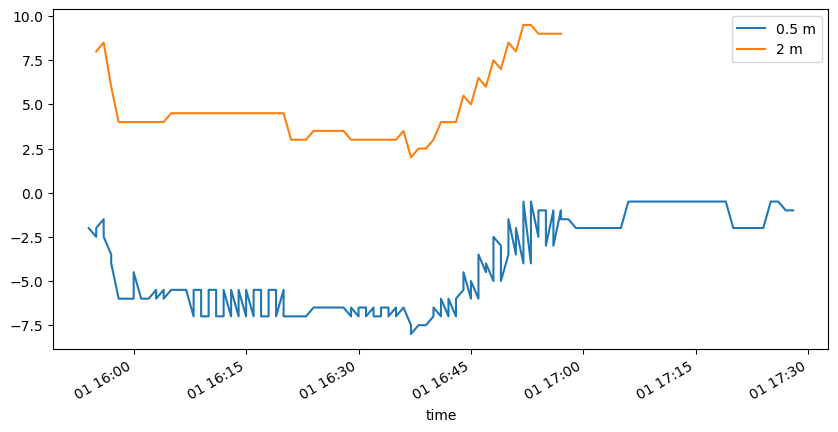

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

for idx, file in enumerate(file_paths):
    # Get data from one sensor
    data_from_one_sensor = combined_data[combined_data.file >= file].copy()
    
    # Diplace values to separate sensors 
    data_from_one_sensor['temperature'] += idx*10   
    
    # Plot data for current sensor 
    data_from_one_sensor.plot(x='time', y='temperature', ax=ax, label=str(height[idx]) + ' m')
    
# Remove y axes tick labels


### Optional: Calculate gradients from different heights